In [1]:
import os
import random
import glob
import numpy as np

from PIL import Image
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
def remove_other_class(cls_img):
    cls_img = np.array(cls_img)
    cls_img = np.array(cls_img == 4, dtype=np.uint8) * 1
    out_img = Image.fromarray(cls_img, 'L')
    return out_img

def resize(img_path, width, height):
    resized_img = Image.open(img_path)
    resized_img.resize((width, height))

    return resized_img

In [3]:
gta5_root = './GTA5_dataset'
gta5_train_dir = os.path.join(gta5_root, 'train')
gta5_train_img = os.path.join(gta5_train_dir, 'img')
gta5_train_cls = os.path.join(gta5_train_dir, 'cls')

n_sequences = 9

sequences = [str(i+1) for i in range(n_sequences)]
for i in range(len(sequences)):
    while len(sequences[i]) < 3:
        sequences[i] = '0' + sequences[i]
        
print(sequences)

['001', '002', '003', '004', '005', '006', '007', '008', '009']


# Visualize Train set

15 15
./GTA5_dataset/train/img/005/005_00040.png ./GTA5_dataset/train/cls/005/005_00040.png
Train image shape (1080, 1920, 3)
Train label shape (1080, 1920)
Unique labels [ 0  1  2  3  4  6  7  8  9 10 11 12 13 14 15 18 20 24 27] [ 16231    535 453377 770318     28  90530  17150  13735 178988 184220
      2  10871     83  12670     79      6    179 316202   8396]


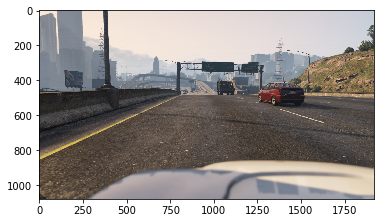

In [4]:
random_seq = sequences[random.randint(0, n_sequences - 1)]
gta5_seq_img_dir = os.path.join(gta5_train_img, random_seq)
gta5_seq_cls_dir = os.path.join(gta5_train_cls, random_seq)

gta5_seq_img_paths = sorted(glob.glob(os.path.join(gta5_seq_img_dir, '*.png')))
gta5_seq_cls_paths = sorted(glob.glob(os.path.join(gta5_seq_cls_dir, '*.png')))

img_idx = random.randint(0, len(gta5_seq_img_paths) - 1)
print(len(gta5_seq_img_paths), len(gta5_seq_cls_paths))
gta5_seq_img_path = gta5_seq_img_paths[img_idx]
gta5_seq_cls_path = gta5_seq_cls_paths[img_idx]

gta5_seq_img = np.array(Image.open(gta5_seq_img_path))
gta5_seq_cls = np.array(Image.open(gta5_seq_cls_path))
print(gta5_seq_img_path, gta5_seq_cls_path)
print('Train image shape', gta5_seq_img.shape)
print('Train label shape', gta5_seq_cls.shape)
colors, counts = np.unique(gta5_seq_cls, return_counts = True)
print('Unique labels', colors, counts)

plt.imshow(gta5_seq_img)


[0 1]


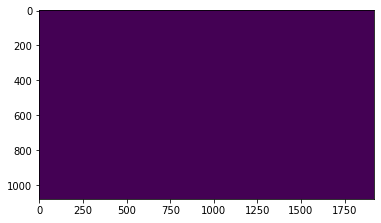

In [5]:
sidewalk_mask = np.array(gta5_seq_cls == 4, dtype=np.int8)
print(np.unique(sidewalk_mask))
plt.imshow(sidewalk_mask)

In [10]:
train_sequences = ['043', '049', '050', '062', '065', '066', '068', '069', '071', '072', '075']
#train_sequences = ['001', '002', '003', '004', '005', '006', '007', '008', '009']

In [7]:
with open(os.path.join(gta5_root, 'train.txt'), 'w') as train_file:
    for train_sq in train_sequences:
        gta5_seq_img_dir = os.path.join(gta5_train_img, train_sq)
        gta5_seq_cls_dir = os.path.join(gta5_train_cls, train_sq)

        gta5_seq_img_paths = sorted(glob.glob(os.path.join(gta5_seq_img_dir, '*.png')))
        gta5_seq_cls_paths = sorted(glob.glob(os.path.join(gta5_seq_cls_dir, '*.png')))
        
        for i in range(len(gta5_seq_img_paths)):
            img = Image.open(gta5_seq_img_paths[i])
            cls = Image.open(gta5_seq_cls_paths[i])
            
            img = img.resize((600, 338))
            cls = cls.resize((600, 338))
            
            cls = remove_other_class(cls)
            
            img_out_path = gta5_seq_img_paths[i].replace('.png', '_processed.png')
            cls_out_path = gta5_seq_cls_paths[i].replace('.png', '_processed.png')
            
            
            
            img.save(img_out_path)
            cls.save(cls_out_path)
            
            pair = '{} {}\n'.format(img_out_path, cls_out_path)
            train_file.write(pair)
    train_file.close()

In [11]:
# Measure frequency of class c
#train_sequences = ['001', '002', '003', '004', '005', '006', '007', '008', '009']
def get_freq(train_sequences):
    pixel_counts = {
        0: 0,
        1: 0,
        'n_image_0': 0,
        'n_image_1': 0
    }
    for train_sq in train_sequences:
        gta5_seq_cls_dir = os.path.join(gta5_train_cls, train_sq)

        gta5_seq_cls_paths = sorted(glob.glob(os.path.join(gta5_seq_cls_dir, '*_processed.png')))
        
        for i in range(len(gta5_seq_cls_paths)):
            cls = Image.open(gta5_seq_cls_paths[i])
            
            values, counts = np.unique(cls, return_counts = True)
            for i in range(len(values)):
                pixel_counts[values[i]] += counts[i]
                pixel_counts['n_image_' + str(values[i])] += 1
    
    return pixel_counts[0] / (pixel_counts['n_image_0'] * 600 * 338), pixel_counts[1] / (pixel_counts['n_image_1'] * 600 * 338)
            
get_freq(train_sequences)

(0.8008149881507758, 0.20370028259696552)

# Visualize dev set

In [12]:
gta5_val_dir = os.path.join(gta5_root, 'val')
gta5_val_img = os.path.join(gta5_val_dir, 'img')
gta5_val_cls = os.path.join(gta5_val_dir, 'cls')

n_val_sequences = 9

val_sequences = [str(i+1) for i in range(n_val_sequences)]
for i in range(len(val_sequences)):
    while len(val_sequences[i]) < 3:
        val_sequences[i] = '0' + val_sequences[i]
        
print(val_sequences)

['001', '002', '003', '004', '005', '006', '007', '008', '009']


336 336
./GTA5_dataset/val/img/005/005_01560_processed.png ./GTA5_dataset/val/cls/005/005_01560_processed.png
Val image shape (338, 600, 3)
Val label shape (338, 600)
Unique labels [0 4]


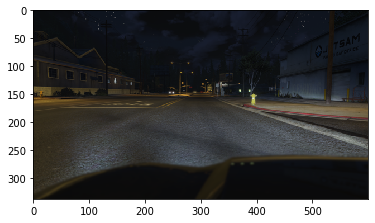

In [13]:
random_val_seq = val_sequences[random.randint(1, n_val_sequences)]
gta5_val_seq_img_dir = os.path.join(gta5_val_img, random_val_seq)
gta5_val_seq_cls_dir = os.path.join(gta5_val_cls, random_val_seq)

gta5_val_seq_img_paths = sorted(glob.glob(os.path.join(gta5_val_seq_img_dir, '*.png')))
gta5_val_seq_cls_paths = sorted(glob.glob(os.path.join(gta5_val_seq_cls_dir, '*.png')))

img_idx = random.randint(0, len(gta5_val_seq_img_paths) - 1)
print(len(gta5_val_seq_img_paths), len(gta5_val_seq_cls_paths))
gta5_val_seq_img_path = gta5_val_seq_img_paths[img_idx]
gta5_val_seq_cls_path = gta5_val_seq_cls_paths[img_idx]

gta5_val_seq_img = np.array(Image.open(gta5_val_seq_img_path))
gta5_val_seq_cls = np.array(Image.open(gta5_val_seq_cls_path))
plt.imshow(gta5_val_seq_img)

print(gta5_val_seq_img_path, gta5_val_seq_cls_path)
print('Val image shape', gta5_val_seq_img.shape)
print('Val label shape', gta5_val_seq_cls.shape)
print('Unique labels', np.unique(gta5_val_seq_cls))

[0 4]


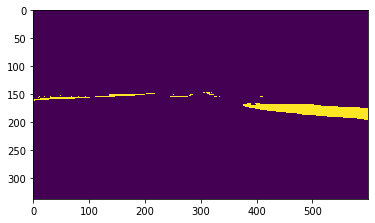

In [14]:
sidewalk_mask = np.array(gta5_val_seq_cls == 4, dtype=np.int8) * 4
print(np.unique(sidewalk_mask))
plt.imshow(sidewalk_mask)

In [15]:
with open(os.path.join(gta5_root, 'val.txt'), 'w') as val_file:
    for val_sq in val_sequences:
        gta5_val_seq_img_dir = os.path.join(gta5_val_img, val_sq)
        gta5_val_seq_cls_dir = os.path.join(gta5_val_cls, val_sq)

        gta5_val_seq_img_paths = sorted(glob.glob(os.path.join(gta5_val_seq_img_dir, '*.png')))
        gta5_val_seq_cls_paths = sorted(glob.glob(os.path.join(gta5_val_seq_cls_dir, '*.png')))
        
        for i in range(len(gta5_val_seq_img_paths)):
            img = Image.open(gta5_val_seq_img_paths[i])
            cls = Image.open(gta5_val_seq_cls_paths[i])
            
            img = img.resize((600, 338))
            cls = cls.resize((600, 338))
            
            cls = remove_other_class(cls)
            
            img_out_path = gta5_val_seq_img_paths[i].replace('.png', '_processed.png')
            cls_out_path = gta5_val_seq_cls_paths[i].replace('.png', '_processed.png')
            
            img.save(img_out_path)
            cls.save(cls_out_path)
            
            pair = '{} {}\n'.format(img_out_path, cls_out_path)
            val_file.write(pair)
    val_file.close()